<a href="https://colab.research.google.com/github/Vicks-2019/Stock-Market-Analysis-using-Python-ML/blob/master/Stock_Trading_with_Bollinger_Bands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Algo Trading using bollinger band strategy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [55]:
# load the dataset
from google.colab import files
files.upload()

Saving TSLA.csv to TSLA (2).csv


{'TSLA.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2016-04-11,50.200001,51.798000,49.060001,49.984001,49.984001,45808500\n2016-04-12,49.900002,50.360001,48.726002,49.563999,49.563999,28816000\n2016-04-13,49.702000,51.099998,49.466000,50.905998,50.905998,24628000\n2016-04-14,50.599998,51.368000,50.209999,50.372002,50.372002,20661000\n2016-04-15,50.262001,50.919998,49.824001,50.902000,50.902000,18762000\n2016-04-18,50.445999,51.661999,50.332001,50.776001,50.776001,21357000\n2016-04-19,50.624001,50.874001,48.250000,49.473999,49.473999,31787500\n2016-04-20,49.251999,50.731998,48.299999,49.993999,49.993999,25970500\n2016-04-21,49.798000,50.180000,49.382000,49.658001,49.658001,13915500\n2016-04-22,49.778000,50.799999,49.141998,50.750000,50.750000,18931500\n2016-04-25,50.602001,51.476002,50.152000,50.363998,50.363998,18351500\n2016-04-26,50.410000,51.146000,49.877998,50.748001,50.748001,16119000\n2016-04-27,50.549999,51.000000,49.880001,50.293999,50.293999,16029000\n2016-04-28,49.97000

In [56]:
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-11,50.200001,51.798000,49.060001,49.984001,49.984001,45808500
1,2016-04-12,49.900002,50.360001,48.726002,49.563999,49.563999,28816000
2,2016-04-13,49.702000,51.099998,49.466000,50.905998,50.905998,24628000
3,2016-04-14,50.599998,51.368000,50.209999,50.372002,50.372002,20661000
4,2016-04-15,50.262001,50.919998,49.824001,50.902000,50.902000,18762000
...,...,...,...,...,...,...,...
499,2018-04-04,50.556000,57.674000,50.400002,57.388000,57.388000,99483500
500,2018-04-05,57.868000,61.251999,57.639999,61.144001,61.144001,95605500
501,2018-04-06,60.200001,61.855999,59.099998,59.860001,59.860001,67601500
502,2018-04-09,60.074001,61.900002,57.841999,57.931999,57.931999,51249000


In [58]:
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-11,50.200001,51.798000,49.060001,49.984001,49.984001,45808500
1,2016-04-12,49.900002,50.360001,48.726002,49.563999,49.563999,28816000
2,2016-04-13,49.702000,51.099998,49.466000,50.905998,50.905998,24628000
3,2016-04-14,50.599998,51.368000,50.209999,50.372002,50.372002,20661000
4,2016-04-15,50.262001,50.919998,49.824001,50.902000,50.902000,18762000
...,...,...,...,...,...,...,...
499,2018-04-04,50.556000,57.674000,50.400002,57.388000,57.388000,99483500
500,2018-04-05,57.868000,61.251999,57.639999,61.144001,61.144001,95605500
501,2018-04-06,60.200001,61.855999,59.099998,59.860001,59.860001,67601500
502,2018-04-09,60.074001,61.900002,57.841999,57.931999,57.931999,51249000


In [59]:
# set index to be date
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [60]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
2016-04-11,2016-04-11,50.200001,51.798000,49.060001,49.984001,49.984001,45808500
2016-04-12,2016-04-12,49.900002,50.360001,48.726002,49.563999,49.563999,28816000
2016-04-13,2016-04-13,49.702000,51.099998,49.466000,50.905998,50.905998,24628000
2016-04-14,2016-04-14,50.599998,51.368000,50.209999,50.372002,50.372002,20661000
2016-04-15,2016-04-15,50.262001,50.919998,49.824001,50.902000,50.902000,18762000
...,...,...,...,...,...,...,...
2018-04-04,2018-04-04,50.556000,57.674000,50.400002,57.388000,57.388000,99483500
2018-04-05,2018-04-05,57.868000,61.251999,57.639999,61.144001,61.144001,95605500
2018-04-06,2018-04-06,60.200001,61.855999,59.099998,59.860001,59.860001,67601500
2018-04-09,2018-04-09,60.074001,61.900002,57.841999,57.931999,57.931999,51249000


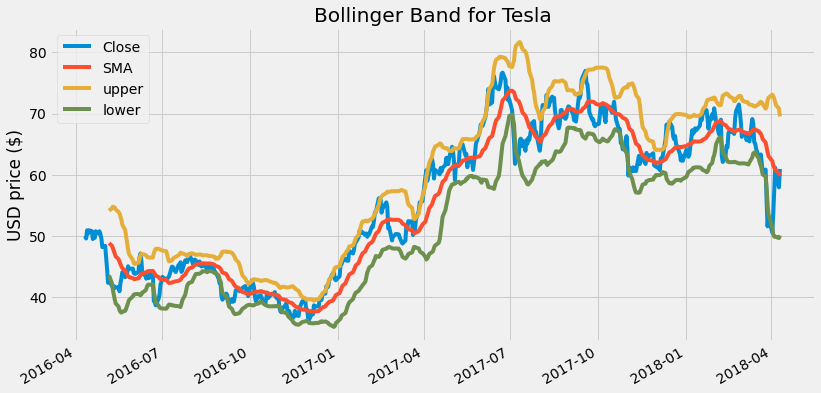

In [61]:
# calculate the simple moving average , standard deviation , upper band , lower band by using 20 days time period
period = 20
df['SMA'] = df['Close'].rolling(window=period).mean()
df['STD'] = df['Close'].rolling(window=period).std()
df['upper'] = df['SMA'] + (df['STD']*2)
df['lower'] = df['SMA'] - (df['STD']*2)

# create a list of columns to keep
column_list = ['Close','SMA','upper','lower']

df[column_list].plot(figsize=(12.2,6.4))
plt.title('Bollinger Band for Tesla')
plt.ylabel('USD price ($)')
plt.show()
 

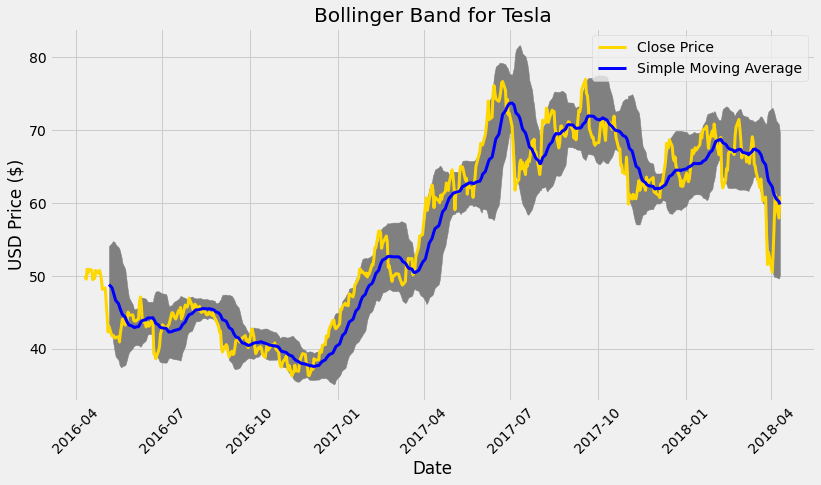

In [62]:
# plot and shade the area between the two bollinger bands
# get the figure and the figure size
fig = plt.figure(figsize=(12.2,6.4))
# add the subplot
ax = fig.add_subplot(1,1,1)
# get the index values of the data frame
x_axis = df.index
# plot and the shade the area between the upper band and lower band grey
ax.fill_between(x_axis,df['upper'],df['lower'],color = 'grey')
#plot the closing price and the moving average
ax.plot(x_axis,df['Close'],color = 'gold',lw = 3,label = 'Close Price')
ax.plot(x_axis,df['SMA'],color = 'blue',lw = 3,label = 'Simple Moving Average')
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()


In [64]:
# create a new data frame
new_df = df[period-1:]
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,STD,upper,lower
2016-05-06,2016-05-06,42.174000,43.273998,41.622002,42.986000,42.986000,28426000,48.805400,2.646629,54.098659,43.512141
2016-05-09,2016-05-09,43.144001,43.230000,41.360001,41.784000,41.784000,23882000,48.395400,3.057667,54.510735,42.280065
2016-05-10,2016-05-10,41.509998,41.894001,41.000000,41.737999,41.737999,20353000,48.004100,3.383632,54.771363,41.236837
2016-05-11,2016-05-11,41.518002,43.096001,41.209999,41.792000,41.792000,25809500,47.548400,3.580255,54.708909,40.387891
2016-05-12,2016-05-12,42.287998,42.334000,40.731998,41.456001,41.456001,18252500,47.102600,3.760712,54.624023,39.581177
...,...,...,...,...,...,...,...,...,...,...,...
2018-04-04,2018-04-04,50.556000,57.674000,50.400002,57.388000,57.388000,99483500,61.149999,5.643143,72.436285,49.863714
2018-04-05,2018-04-05,57.868000,61.251999,57.639999,61.144001,61.144001,95605500,60.884199,5.503334,71.890868,49.877531
2018-04-06,2018-04-06,60.200001,61.855999,59.099998,59.860001,59.860001,67601500,60.586199,5.382026,71.350252,49.822147
2018-04-09,2018-04-09,60.074001,61.900002,57.841999,57.931999,57.931999,51249000,60.211100,5.286963,70.785025,49.637174


In [68]:
# create a function to get the buy and sell signals
def get_signal(data):

  buy_signal = []
  sell_signal = []

  for i in range(len(data['Close'])):
    if data['Close'][i] > data['upper'][i]: # you should sell
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['Close'][i] < data['lower'][i]: # you shold buy
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)

  return (buy_signal,sell_signal)

      

In [70]:
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


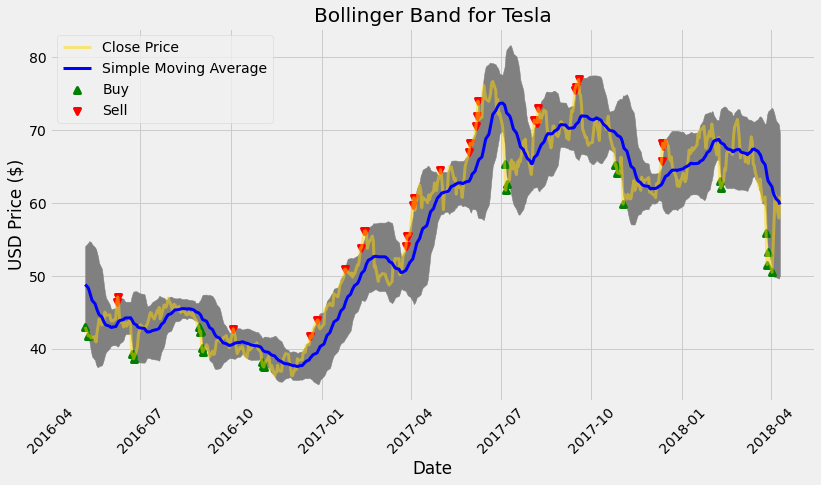

In [74]:
# plot and shade the area between the two bollinger bands
# get the figure and the figure size
fig = plt.figure(figsize=(12.2,6.4))
# add the subplot
ax = fig.add_subplot(1,1,1)
# get the index values of the data frame
x_axis = new_df.index
# plot and the shade the area between the upper band and lower band grey
ax.fill_between(x_axis,new_df['upper'],new_df['lower'],color = 'grey')
#plot the closing price and the moving average
ax.plot(x_axis,new_df['Close'],color = 'gold',lw = 3,label = 'Close Price',alpha = 0.5)
ax.plot(x_axis,new_df['SMA'],color = 'blue',lw = 3,label = 'Simple Moving Average')
ax.scatter(x_axis,new_df['Buy'],color = 'green',lw=3,label = 'Buy',marker = '^',alpha=1)
ax.scatter(x_axis,new_df['Sell'],color = 'red',lw=3,label = 'Sell',marker = 'v',alpha=1)
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()